In [35]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp


file_paths = Series(
             ['Sales_January_2019.csv', 'Sales_February_2019.csv', 'Sales_March_2019.csv',
              'Sales_April_2019.csv', 'Sales_May_2019.csv', 'Sales_June_2019.csv',
              'Sales_July_2019.csv', 'Sales_August_2019.csv', 'Sales_September_2019.csv',
              'Sales_October_2019.csv', 'Sales_November_2019.csv', 'Sales_December_2019.csv'],

              index = np.arange(12)
              )


data_months = []

for i in range(12):
    data_months.append(pd.read_csv(file_paths[i]))

all_data = pd.concat(data_months)
all_data.index = np.arange(186850)



In [36]:
def change_dtype(value):
    value = str(value)
    if value == 'Price Each':
        value = 0

    return float(value)    


### Converting strings to float & replacing string 'Price Each' with zero    
all_data['Price Each'] = all_data['Price Each'].apply(change_dtype)
### Removing rows with all of the information being non-existent
all_data = all_data.dropna(how='all')

### Cheking on corrupted values
# all_data[all_data['Order ID']=='Order ID']

### Filtering dataframe
all_data= all_data[all_data.Product != 'Product']


In [37]:
### converting string in 'Quantity Ordered' to float values
def convert_string_to_int (value):
    value = str(value)
    return float(value)
    
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].apply(convert_string_to_int)


monthly_profit = pd.Series(np.zeros(12), 
                          index=[
                          'January', 'February', 'March',
                          'April', 'May', 'June',
                          'July', 'August', 'September',
                          'October', 'November', 'December',      
                          ])  

all_data.insert(5, 'Month', all_data['Order Date'].str[0:2])



In [38]:
# all_data['Month'] = all_data['Month'].astype(float)
all_data.loc[all_data['Month'] == '01', 'Month'] = 'January'
all_data.loc[all_data['Month'] == '02', 'Month'] = 'February'
all_data.loc[all_data['Month'] == '03', 'Month'] = 'March'
all_data.loc[all_data['Month'] == '04', 'Month'] = 'April'
all_data.loc[all_data['Month'] == '05', 'Month'] = 'May'
all_data.loc[all_data['Month'] == '06', 'Month'] = 'June'
all_data.loc[all_data['Month'] == '07', 'Month'] = 'July'
all_data.loc[all_data['Month'] == '08', 'Month'] = 'August'
all_data.loc[all_data['Month'] == '09', 'Month'] = 'September'
all_data.loc[all_data['Month'] == '10', 'Month'] = 'October'
all_data.loc[all_data['Month'] == '11', 'Month'] = 'November'
all_data.loc[all_data['Month'] == '12', 'Month'] = 'December'

all_data.insert(4, 'Total Price', all_data['Quantity Ordered']*all_data['Price Each'])



In [39]:
all_data.groupby('Month').sum()['Total Price']
all_data[:10]

,Order ID,Product,Quantity Ordered,Price Each,Total Price,Order Date,Month,Purchase Address
0,141234,iPhone,1.0,700.00,700.00,01/22/19 21:25,January,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1.0,14.95,14.95,01/28/19 14:15,January,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2.0,11.99,23.98,01/17/19 13:33,January,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1.0,149.99,149.99,01/05/19 20:33,January,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1.0,11.99,11.99,01/25/19 11:59,January,"387 10th St, Austin, TX 73301"
5,141239,AAA Batteries (4-pack),1.0,2.99,2.99,01/29/19 20:22,January,"775 Willow St, San Francisco, CA 94016"
6,141240,27in 4K Gaming Monitor,1.0,389.99,389.99,01/26/19 12:16,January,"979 Park St, Los Angeles, CA 90001"
7,141241,USB-C Charging Cable,1.0,11.95,11.95,01/05/19 12:04,January,"181 6th St, San Francisco, CA 94016"
8,141242,Bose SoundSport Headphones,1.0,99.99,99.99,01/01/19 10:30,January,"867 Willow St, Los Angeles, CA 90001"
9,141243,Apple Airpods Headphones,1.0,150.00,150.00,01/22/19 21:20,January,"657 Johnson St, San Francisco, CA 94016"


In [40]:
def adding_city_and_state (value):
    value = str(value)
    value = value.split(',')
    city_value = value[1]
    state_value = value[2].split()[0]
    city_and_state = f'{city_value} ({state_value})'

    return city_and_state

all_data['City'] = ''
all_data['City'] = all_data['Purchase Address'].apply(adding_city_and_state)
all_data.rename(columns={'City': 'City (State)'})

all_data.groupby('Product').sum()['Total Price'].sort_values(ascending=False)


Product
Macbook Pro Laptop            8037600.00
iPhone                        4794300.00
ThinkPad Laptop               4129958.70
Google Phone                  3319200.00
27in 4K Gaming Monitor        2435097.56
34in Ultrawide Monitor        2355558.01
Apple Airpods Headphones      2349150.00
Flatscreen TV                 1445700.00
Bose SoundSport Headphones    1345565.43
27in FHD Monitor              1132424.50
Vareebadd Phone                827200.00
20in Monitor                   454148.71
LG Washing Machine             399600.00
LG Dryer                       387600.00
Lightning Charging Cable       347094.15
USB-C Charging Cable           286501.25
Wired Headphones               246478.43
AA Batteries (4-pack)          106118.40
AAA Batteries (4-pack)          92740.83
Name: Total Price, dtype: float64

In [41]:
all_data[:10]

,Order ID,Product,Quantity Ordered,Price Each,Total Price,Order Date,Month,Purchase Address,City
0,141234,iPhone,1.0,700.00,700.00,01/22/19 21:25,January,"944 Walnut St, Boston, MA 02215",Boston (MA)
1,141235,Lightning Charging Cable,1.0,14.95,14.95,01/28/19 14:15,January,"185 Maple St, Portland, OR 97035",Portland (OR)
2,141236,Wired Headphones,2.0,11.99,23.98,01/17/19 13:33,January,"538 Adams St, San Francisco, CA 94016",San Francisco (CA)
3,141237,27in FHD Monitor,1.0,149.99,149.99,01/05/19 20:33,January,"738 10th St, Los Angeles, CA 90001",Los Angeles (CA)
4,141238,Wired Headphones,1.0,11.99,11.99,01/25/19 11:59,January,"387 10th St, Austin, TX 73301",Austin (TX)
5,141239,AAA Batteries (4-pack),1.0,2.99,2.99,01/29/19 20:22,January,"775 Willow St, San Francisco, CA 94016",San Francisco (CA)
6,141240,27in 4K Gaming Monitor,1.0,389.99,389.99,01/26/19 12:16,January,"979 Park St, Los Angeles, CA 90001",Los Angeles (CA)
7,141241,USB-C Charging Cable,1.0,11.95,11.95,01/05/19 12:04,January,"181 6th St, San Francisco, CA 94016",San Francisco (CA)
8,141242,Bose SoundSport Headphones,1.0,99.99,99.99,01/01/19 10:30,January,"867 Willow St, Los Angeles, CA 90001",Los Angeles (CA)
9,141243,Apple Airpods Headphones,1.0,150.00,150.00,01/22/19 21:20,January,"657 Johnson St, San Francisco, CA 94016",San Francisco (CA)


In [42]:
time = all_data.loc[0,'Order Date'].split()[1]
time_hours_in_minutes = int(time[:2])*60
time_minutes = int(time[3:])
time_hours_in_minutes+time_minutes


def get_time_of_purchase(value):
    time = value.split()[1]
    time_hours_in_minutes = int(time[:2])*60
    time_minutes = int(time[3:])
    return time_hours_in_minutes+time_minutes


# all_data.insert(6, 'Time of Purchase in min', np.zeros(len(all_data))) 

all_data['Time of Purchase in min'] = all_data['Order Date'].apply(get_time_of_purchase)


best_time_to_advertise = Series(np.zeros(24), index=np.arange(1, 25))



In [45]:
### Переиндексация
all_data = all_data.set_index(np.arange(185950))
all_data.isnull().sum()


Order ID                   0
Product                    0
Quantity Ordered           0
Price Each                 0
Total Price                0
Order Date                 0
Month                      0
Purchase Address           0
City                       0
Time of Purchase in min    0
dtype: int64

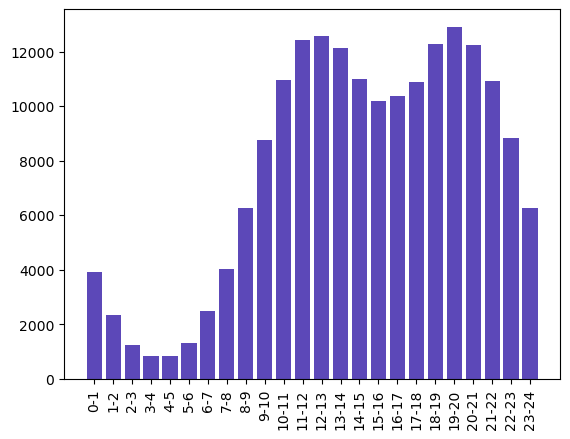

In [46]:
for i in range(len(all_data)):
    time_of_purchase = all_data.loc[i, 'Time of Purchase in min']

    if time_of_purchase < 60:
        best_time_to_advertise[1]+=1
    elif 60 <= time_of_purchase < 120:
        best_time_to_advertise[2]+=1
    elif 120 <= time_of_purchase < 180:
        best_time_to_advertise[3]+=1
    elif 180 <= time_of_purchase < 240:
        best_time_to_advertise[4]+=1
    elif 240 <= time_of_purchase < 300:
        best_time_to_advertise[5]+=1
    elif 300 <= time_of_purchase < 360:
        best_time_to_advertise[6]+=1
    elif 360 <= time_of_purchase < 420:
        best_time_to_advertise[7]+=1
    elif 420 <= time_of_purchase < 480:
        best_time_to_advertise[8]+=1
    elif 480 <= time_of_purchase < 540:
        best_time_to_advertise[9]+=1
    elif 540 <= time_of_purchase < 600:
        best_time_to_advertise[10]+=1
    elif 600 <= time_of_purchase < 660:
        best_time_to_advertise[11]+=1
    elif 660 <= time_of_purchase < 720:
        best_time_to_advertise[12]+=1
    elif 720 <= time_of_purchase < 780:
        best_time_to_advertise[13]+=1
    elif 780 <= time_of_purchase < 840:
        best_time_to_advertise[14]+=1
    elif 840 <= time_of_purchase < 900:
        best_time_to_advertise[15]+=1
    elif 900 <= time_of_purchase < 960:
        best_time_to_advertise[16]+=1
    elif 960 <= time_of_purchase < 1020:
        best_time_to_advertise[17]+=1
    elif 1020 <= time_of_purchase < 1080:
        best_time_to_advertise[18]+=1
    elif 1080 <= time_of_purchase < 1140:
        best_time_to_advertise[19]+=1
    elif 1140 <= time_of_purchase < 1200:
        best_time_to_advertise[20]+=1
    elif 1200 <= time_of_purchase < 1260:
        best_time_to_advertise[21]+=1
    elif 1260 <= time_of_purchase < 1320:
        best_time_to_advertise[22]+=1
    elif 1320 <= time_of_purchase < 1380:
        best_time_to_advertise[23]+=1
    elif 1380 <= time_of_purchase < 1440:
        best_time_to_advertise[24]+=1                                                                                    


x = list(best_time_to_advertise.index)
y = list(best_time_to_advertise.values)
labels = [
    '0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8',
    '8-9', '9-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16',
    '16-17', '17-18', '18-19', '19-20', '20-21', '21-22', '22-23','23-24'
]


plt.bar(x=x, height=y, color=(0.2, 0.1, 0.65, 0.8))
plt.xticks(x, labels, rotation=90)
plt.show()

In [58]:
duplicated = all_data[all_data['Order ID'].duplicated(keep=False)]
duplicated['Group'] = duplicated.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

duplicated = duplicated[['Order ID', 'Group']].drop_duplicates()

duplicated['Group'].value_counts().sort_values(ascending=False)

C:\Users\inoke\AppData\Local\Temp\ipykernel_33824\2125153478.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicated['Group'] = duplicated.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


Group
iPhone,Lightning Charging Cable                                                882
Google Phone,USB-C Charging Cable                                              856
iPhone,Wired Headphones                                                        361
Vareebadd Phone,USB-C Charging Cable                                           312
Google Phone,Wired Headphones                                                  303
                                                                              ... 
Google Phone,USB-C Charging Cable,Wired Headphones,iPhone                        1
LG Washing Machine,AA Batteries (4-pack)                                         1
LG Dryer,27in 4K Gaming Monitor                                                  1
AAA Batteries (4-pack),LG Dryer                                                  1
Google Phone,USB-C Charging Cable,Wired Headphones,Apple Airpods Headphones      1
Name: count, Length: 366, dtype: int64

In [62]:
all_data['Product'].value_counts().sort_values()

Product
LG Dryer                        646
LG Washing Machine              666
Vareebadd Phone                2065
20in Monitor                   4101
ThinkPad Laptop                4128
Macbook Pro Laptop             4724
Flatscreen TV                  4800
Google Phone                   5525
34in Ultrawide Monitor         6181
27in 4K Gaming Monitor         6230
iPhone                         6842
27in FHD Monitor               7507
Bose SoundSport Headphones    13325
Apple Airpods Headphones      15549
Wired Headphones              18882
AA Batteries (4-pack)         20577
AAA Batteries (4-pack)        20641
Lightning Charging Cable      21658
USB-C Charging Cable          21903
Name: count, dtype: int64

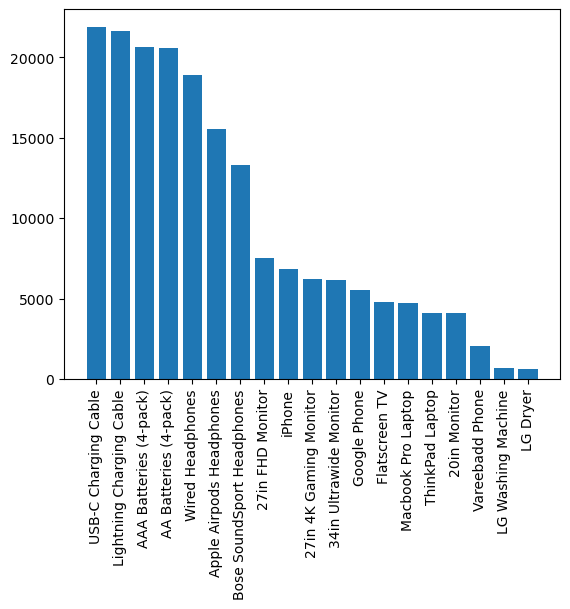

In [65]:
appereance = all_data['Product'].value_counts().values
product = all_data['Product'].value_counts().index

plt.bar(x=np.arange(len(appereance)), height=appereance)
plt.xticks(np.arange(len(appereance)), product, rotation=90)
plt.show()